In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice

In [81]:
def moran_simulation(freq_a: float, population_size: int, max_iterations: int) -> tuple[list[int], list[tuple[int,int]]]:
    iterations = []
    nb_a = int(freq_a * population_size)
    nb_b = population_size - nb_a
    pops = []
    for i in range(max_iterations):
        iterations.append(i)
        pops.append((nb_a, nb_b))
        a_or_b_birth = choice(["a"] * nb_a + ["b"] * nb_b)
        a_or_b_death = choice(["a"] * nb_a + ["b"]*nb_b)
        if a_or_b_birth != a_or_b_death:
            if a_or_b_death == "a":
                nb_a -= 1
                nb_b += 1
            else:
                nb_a += 1
                nb_b -= 1
    return iterations, pops

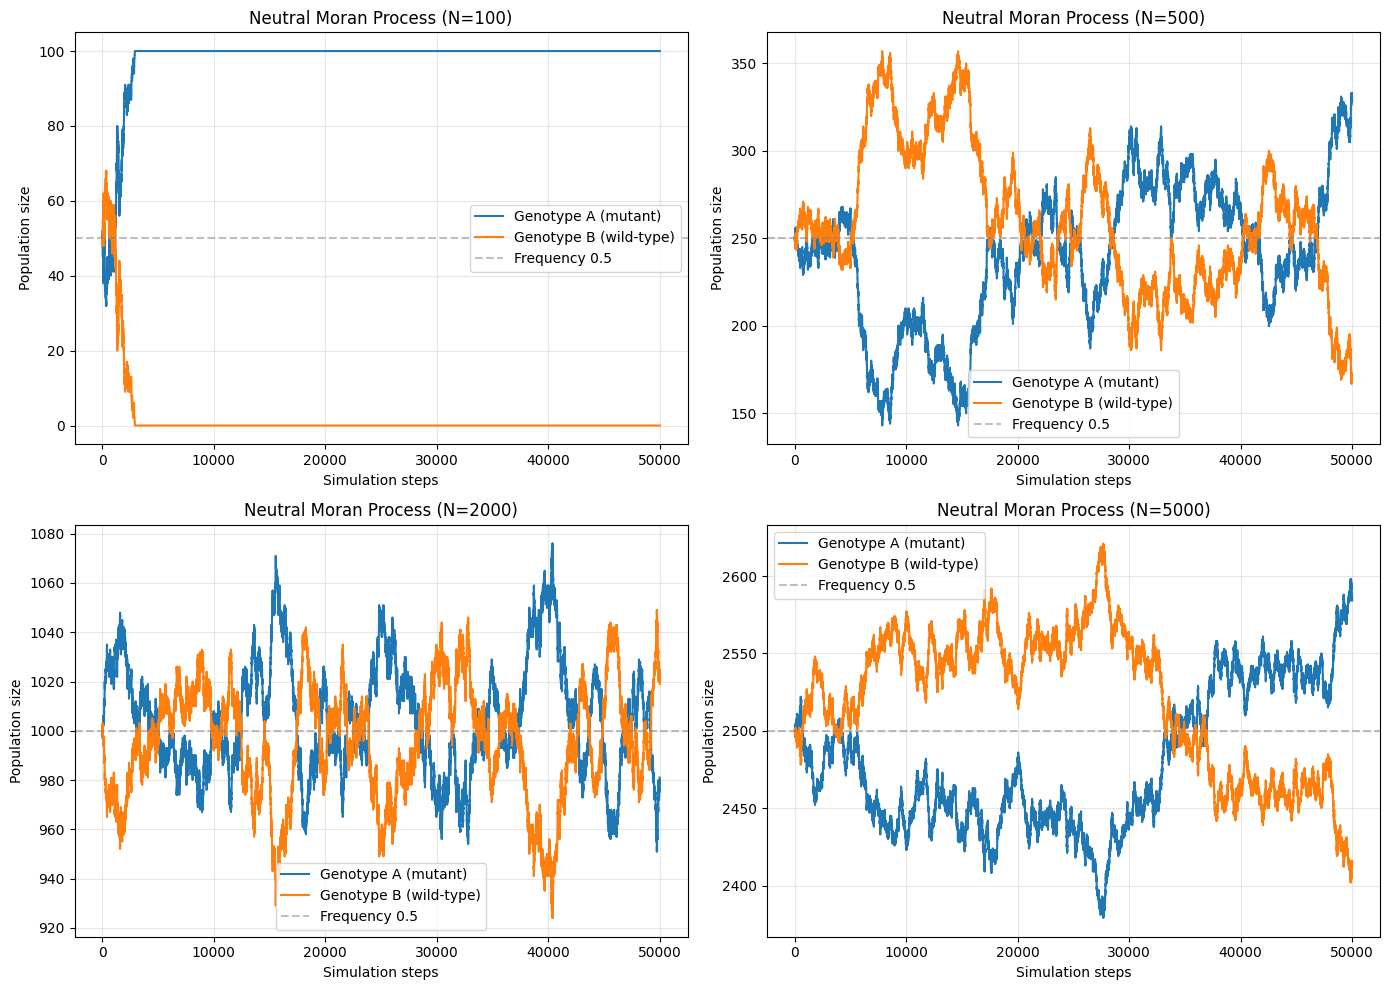

In [82]:
# Q1: Tester plusieurs tailles de population
population_sizes = [100, 500, 2000, 5000]
max_iter = 50000

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, pop_size in enumerate(population_sizes):
    itera, pops = moran_simulation(0.5, pop_size, max_iter)
    
    axes[idx].plot(itera, [po[0] for po in pops], label='Genotype A (mutant)', linewidth=1.5)
    axes[idx].plot(itera, [po[1] for po in pops], label='Genotype B (wild-type)', linewidth=1.5)
    axes[idx].axhline(y=pop_size/2, color='gray', linestyle='--', alpha=0.5, label='Frequency 0.5')
    axes[idx].set_xlabel('Simulation steps')
    axes[idx].set_ylabel('Population size')
    axes[idx].set_title(f'Neutral Moran Process (N={pop_size})')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [83]:
def moran_simulation_lifetime(freq_a: float, population_size: int, max_iterations: int) -> list[int]:
    """
    Retourne la liste de tous les lifetimes observés pendant la simulation
    """
    nb_a = int(freq_a * population_size)
    nb_b = population_size - nb_a
    pop = [("a", 0) for _ in range(nb_a)] + [("b", 0) for _ in range(nb_b)]
    lifetimes = []
    
    for i in range(max_iterations):
        # Birth proportional to population (neutral)
        birth_type, _ = choice(pop)
        death_individual = choice(pop)
        death_type, birth_date = death_individual
        
        # Calculer et enregistrer le lifetime
        lifetime = i - birth_date
        lifetimes.append(lifetime)
        
        # Remplacer l'individu mort par un nouveau-né
        pop.remove(death_individual)
        pop.append((birth_type, i))
    
    return lifetimes


In [84]:
lifetimes = moran_simulation_lifetime(0.5, 2000, 50000)


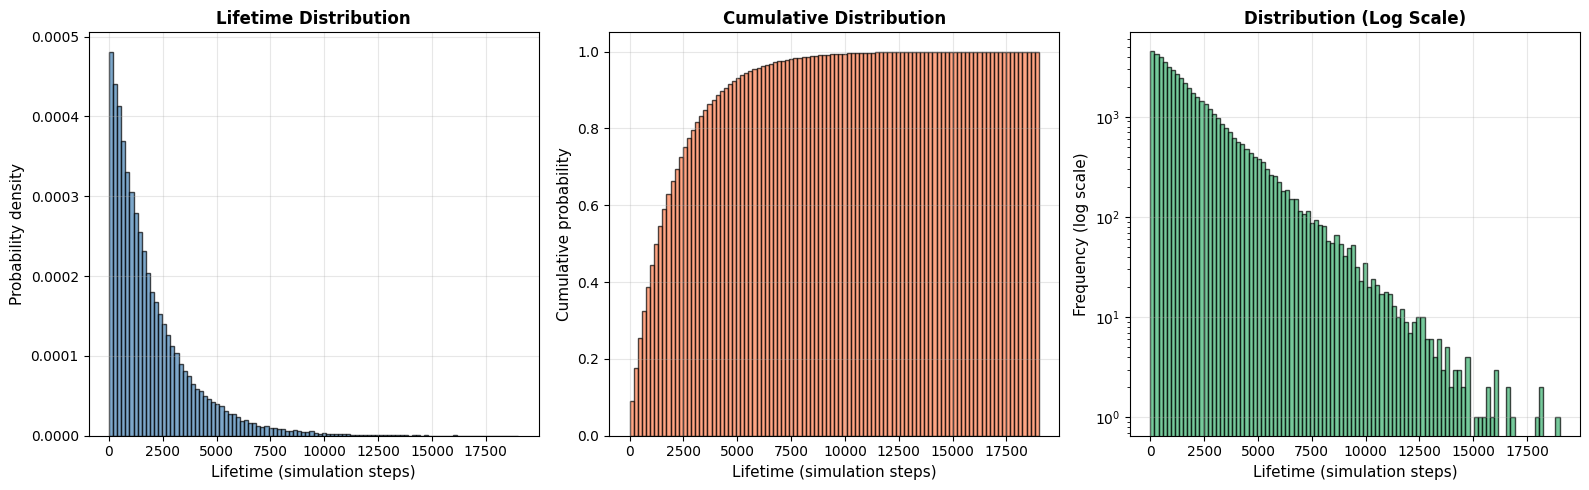

=== Lifetime Statistics ===
Total deaths recorded: 50,000
Mean lifetime: 1922.05 steps
Median lifetime: 1338.00 steps
Std deviation: 1914.19 steps
Min lifetime: 0
Max lifetime: 19007

=== Conversion to Biological Time ===
Population size N = 2000
Mean lifetime: 1922.05 steps ≈ 0.9610 generations
If generation time = 20 min, mean lifetime ≈ 19.22 minutes


In [85]:
# Q2: Visualiser la distribution des lifetimes
plt.figure(figsize=(16, 5))

# Histogramme
plt.subplot(1, 3, 1)
plt.hist(lifetimes, bins=100, density=True, alpha=0.7, edgecolor='black', color='steelblue')
plt.xlabel('Lifetime (simulation steps)', fontsize=11)
plt.ylabel('Probability density', fontsize=11)
plt.title('Lifetime Distribution', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Distribution cumulative
plt.subplot(1, 3, 2)
plt.hist(lifetimes, bins=100, density=True, alpha=0.7, edgecolor='black', cumulative=True, color='coral')
plt.xlabel('Lifetime (simulation steps)', fontsize=11)
plt.ylabel('Cumulative probability', fontsize=11)
plt.title('Cumulative Distribution', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Log-scale pour voir la queue de distribution
plt.subplot(1, 3, 3)
plt.hist(lifetimes, bins=100, alpha=0.7, edgecolor='black', color='mediumseagreen')
plt.xlabel('Lifetime (simulation steps)', fontsize=11)
plt.ylabel('Frequency (log scale)', fontsize=11)
plt.title('Distribution (Log Scale)', fontsize=12, fontweight='bold')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques
print(f"=== Lifetime Statistics ===")
print(f"Total deaths recorded: {len(lifetimes):,}")
print(f"Mean lifetime: {np.mean(lifetimes):.2f} steps")
print(f"Median lifetime: {np.median(lifetimes):.2f} steps")
print(f"Std deviation: {np.std(lifetimes):.2f} steps")
print(f"Min lifetime: {min(lifetimes)}")
print(f"Max lifetime: {max(lifetimes)}")
print(f"\n=== Conversion to Biological Time ===")
print(f"Population size N = 2000")
print(f"Mean lifetime: {np.mean(lifetimes):.2f} steps ≈ {np.mean(lifetimes)/2000:.4f} generations")
print(f"If generation time = 20 min, mean lifetime ≈ {np.mean(lifetimes)/2000 * 20:.2f} minutes")


In [86]:
def moran_simulation_mutation(freq_a: float, effect_mutation: float, population_size: int, max_iterations: int) -> tuple[list[int], list[tuple[int,int]]]:
    iterations = []
    nb_a = int(freq_a * population_size)
    nb_b = population_size - nb_a
    pops = []
    for i in range(max_iterations):
        iterations.append(i)
        pops.append((nb_a, nb_b))
        # Birth proportional to fitness-weighted population
        a_or_b_birth = choice(["a"] * int(nb_a * (1 + effect_mutation)) + ["b"] * nb_b)
        a_or_b_death = choice(["a"] * nb_a + ["b"]*nb_b)
        if a_or_b_birth != a_or_b_death:
            if a_or_b_death == "a":
                nb_a -= 1
                nb_b += 1
            else:
                nb_a += 1
                nb_b -= 1
    return iterations, pops


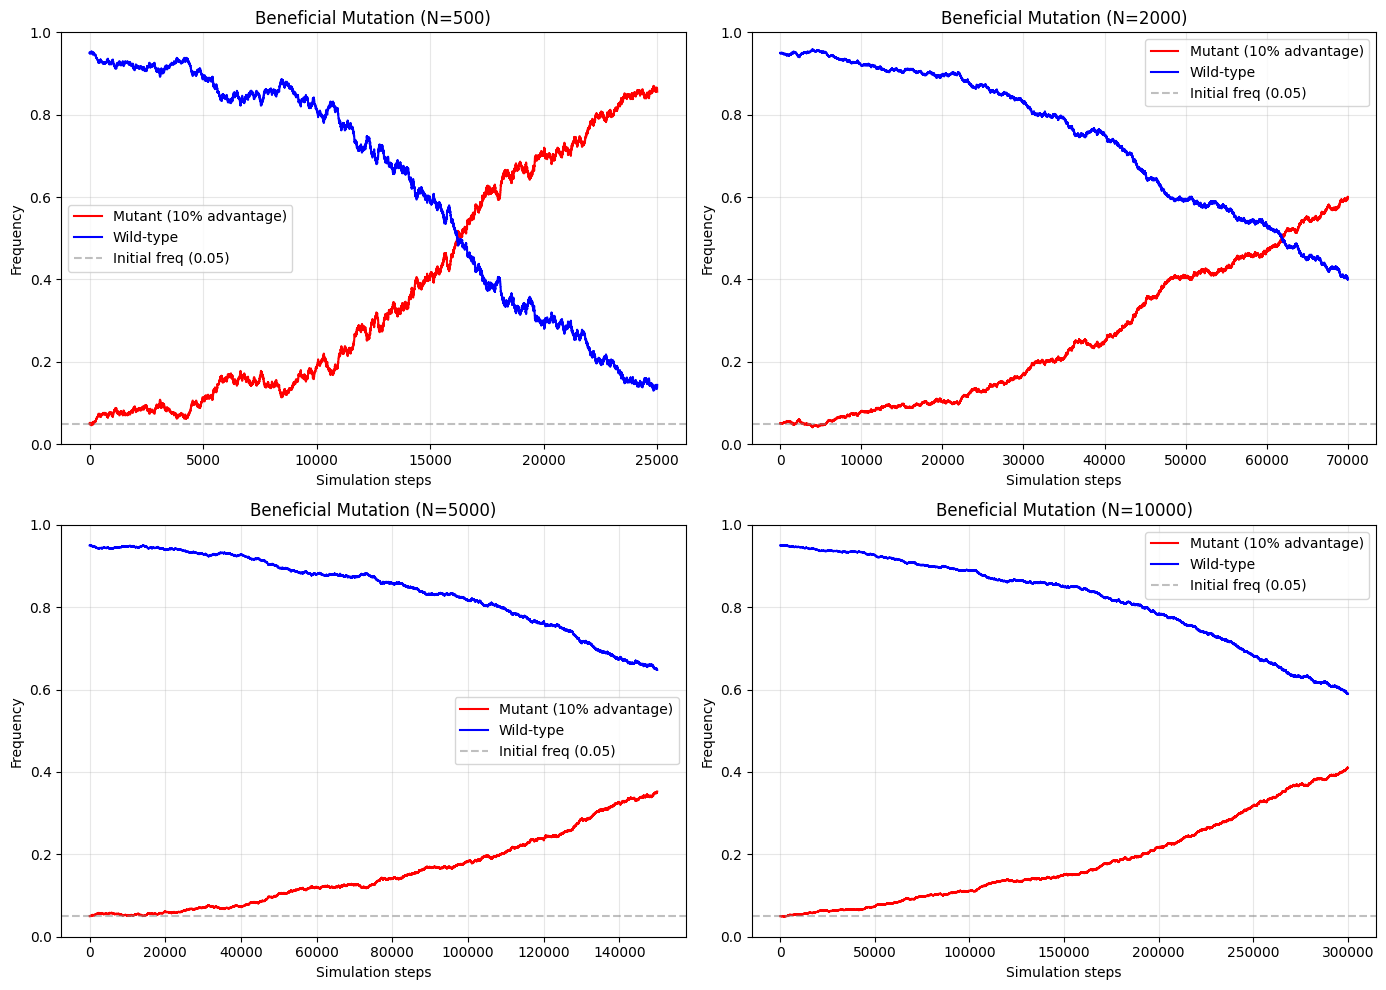

In [87]:
# Q3: Tester la mutation bénéfique avec plusieurs tailles de population
population_sizes = [500, 2000, 5000, 10000]
freq_initial = 0.05  # Initially rare (1%)
fitness_advantage = 0.1  # 10% growth advantage
max_iter = [25000, 70000, 150000, 300000]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, pop_size in enumerate(population_sizes):
    itera, pops = moran_simulation_mutation(freq_initial, fitness_advantage, pop_size, max_iter[idx])
    
    freq_a = [po[0] / pop_size for po in pops]
    freq_b = [po[1] / pop_size for po in pops]
    
    axes[idx].plot(itera, freq_a, label='Mutant (10% advantage)', linewidth=1.5, color='red')
    axes[idx].plot(itera, freq_b, label='Wild-type', linewidth=1.5, color='blue')
    axes[idx].axhline(y=freq_initial, color='gray', linestyle='--', alpha=0.5, label=f'Initial freq ({freq_initial})')
    axes[idx].set_xlabel('Simulation steps')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Beneficial Mutation (N={pop_size})')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim([0, 1])

plt.tight_layout()
plt.show()
